# Importing libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [16]:
sales = pd.read_csv('train.csv')
sales.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [17]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Summary

In [18]:
sales['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

# Preprocessing the data

In [19]:
sales_1 = sales.copy()

In [20]:
sales_1['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

 --> Creating Custom Column Transformers

In [21]:
from sklearn.base import BaseEstimator , TransformerMixin

class ColumnTransfomer(BaseEstimator,TransformerMixin):
    
    def __init__(self , X = True):
        self.X = X
        
    def fit(self , X):
        return self   # Do nothing
    
    def transform(self,X):
        
        x = {'0-17':0 , '18-25':1 , '26-35':2 , '36-45':3 , '46-50':4 , '51-55':5 , '55+':6}
        X['Age'] = X['Age'].map(x)   # Encoding feature 'Age'.
        X['Gender'] = X['Gender'].map({'M':0 , 'F':1})   # Label Encoding feature 'Gender'.
        X.drop('Occupation',inplace=True,axis=1) # Dropping feature 'Occupation'.
        X.drop('City_Category',inplace = True , axis=1) # Dropping feature 'City_Category'.
        X.drop('Stay_In_Current_City_Years',inplace=True,axis=1)   
        X.drop('User_ID',inplace=True,axis=1)
        X.drop('Product_ID',inplace=True,axis=1)

In [22]:
col_trans = ColumnTransfomer()

In [23]:
col_trans.fit_transform(sales_1)

In [24]:
sales_1.head()

,Gender,Age,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,0,3,NaN,NaN,8370
1,1,0,0,1,6.0,14.0,15200
2,1,0,0,12,NaN,NaN,1422
3,1,0,0,12,14.0,NaN,1057
4,0,6,0,8,NaN,NaN,7969


--> Creating pipelines to preprocess the data

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [26]:
pipeline = Pipeline([
    ('impute' , SimpleImputer(strategy='most_frequent'))
])

In [27]:
final_data = pipeline.fit_transform(sales_1)
final_data = pd.DataFrame(data=final_data,columns=sales_1.columns)
final_data.head()

,Gender,Age,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1.0,0.0,0.0,3.0,8.0,16.0,8370.0
1,1.0,0.0,0.0,1.0,6.0,14.0,15200.0
2,1.0,0.0,0.0,12.0,8.0,16.0,1422.0
3,1.0,0.0,0.0,12.0,14.0,16.0,1057.0
4,0.0,6.0,0.0,8.0,8.0,16.0,7969.0


--> Seperating X and y

In [28]:
feat = final_data.drop('Purchase',axis=1)
label = final_data[['Purchase']]

# Model 

# Decision Tree with out scaling the data

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
tree = DecisionTreeRegressor()

In [126]:
tree.fit(feat,label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [127]:
# Predictions

tree_pred = tree.predict(feat)

In [128]:
# RMSE

from sklearn import metrics

np.sqrt(metrics.mean_squared_error(label,tree_pred))

2920.8172611810487

In [129]:
# Evaluating Decision tree

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree , feat , label , scoring = 'neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)

In [130]:
# Results

def display_scores(scores):
    print('scores:' , scores)
    print('Mean:' , scores.mean())
    print('std dev' , scores.std())

In [131]:
display_scores(rmse_scores)

scores: [2949.28730565 2980.22110854 2968.95915914 2942.16244122 2972.71465836
 2955.39370966 2955.82911807 2970.57421418 2976.29756072 2971.60054827]
Mean: 2964.30398238008
std dev 12.03798720020312


# Decision Tree with scaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
pline = Pipeline([
    ('scale' , MinMaxScaler())
]) 

In [31]:
scaled_feat = pline.fit_transform(feat)
scaled_label = pline.fit_transform(label)
scaled_label = scaled_label.ravel()

In [135]:
tree.fit(scaled_feat,scaled_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [136]:
pred_2=tree.predict(scaled_feat)
np.sqrt(metrics.mean_squared_error(scaled_label,pred_2))

0.12195988396931182

In [137]:
scores_2 = cross_val_score(tree , scaled_feat , scaled_label , scoring = 'neg_mean_squared_error',cv=10)
rmse_scores_2 = np.sqrt(-scores_2)

In [138]:
display_scores(rmse_scores_2)

scores: [0.12314573 0.12444032 0.12397586 0.12285119 0.12412688 0.12341069
 0.12341922 0.12403764 0.12427649 0.12408055]
Mean: 0.12377645767150161
std dev 0.0005029226531576532


# Random Forest

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
forest = RandomForestRegressor()

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
grid = [
    {'n_estimators':[3,6] , 'max_features':[2,6]},
    {'bootstrap':[False] , 'n_estimators':[3,10] , 'max_features':[2,3,4]}
]

In [143]:
grid_search = GridSearchCV(estimator = forest , param_grid = grid , scoring = 'neg_mean_squared_error' , cv=5)

In [144]:
grid_search.fit(scaled_feat,scaled_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [145]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [146]:
scores = grid_search.cv_results_

In [147]:
for mean_score , params in zip(scores['mean_test_score'] , scores['params']):
    print(np.sqrt(-mean_score) , params)

0.12403743307177573 {'max_features': 2, 'n_estimators': 3}
0.12390593248129604 {'max_features': 2, 'n_estimators': 6}
0.12401624463574172 {'max_features': 6, 'n_estimators': 3}
0.12388500791261076 {'max_features': 6, 'n_estimators': 6}
0.12385929807470066 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.12384147604741927 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.12383192830790074 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.12382952738255366 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.12383924097008901 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.12383485787130602 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


# Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lm = LinearRegression()

In [150]:
lm.fit(feat,label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
# predictions

pred_lm = lm.predict(feat)

In [152]:
# rmse

np.sqrt(metrics.mean_squared_error(label,pred_lm))

4689.922941277707

In [153]:
lm = LinearRegression()

In [154]:
lm_scores = cross_val_score(estimator=lm , X=feat , y=label , cv=10 , scoring='neg_mean_squared_error')

In [155]:
lm_scores_2 = np.sqrt(-lm_scores)

In [156]:
display_scores(lm_scores_2)

scores: [4660.93632096 4714.08386733 4711.39965045 4675.50520625 4700.16723592
 4714.00050373 4694.18388749 4716.53058529 4725.62694482 4611.35971562]
Mean: 4692.379391786149
std dev 33.00076725981697


# Linear Regression after scaling

In [157]:
lm = LinearRegression()

In [158]:
lm.fit(scaled_feat,scaled_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
# predictions

pred_lm = lm.predict(scaled_feat)

In [160]:
# rmse

np.sqrt(metrics.mean_squared_error(scaled_label,pred_lm))

0.19582959377333947

In [161]:
lm = LinearRegression()

In [162]:
lm_scores = cross_val_score(estimator=lm , X=scaled_feat , y=scaled_label , cv=10 , scoring='neg_mean_squared_error')

In [163]:
lm_scores_2 = np.sqrt(-lm_scores)

In [164]:
display_scores(lm_scores_2)

scores: [0.19461925 0.19683844 0.19672636 0.19522758 0.19625735 0.19683496
 0.19600751 0.19694061 0.19732043 0.19254916]
Mean: 0.19593216383924722
std dev 0.001377960134459545


# SGD Regressor

In [165]:
from sklearn.linear_model import SGDRegressor

In [166]:
# Training SGD regressor with learning rate 0.1 and maximum number of iterations is 1000
sgd_reg = SGDRegressor(max_iter=1000,eta0=0.1 , penalty=None)

In [167]:
sgd_reg.fit(scaled_feat,scaled_label)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [168]:
sgd_reg.intercept_

array([0.51952621])

In [169]:
sgd_reg.coef_

array([-0.02629656,  0.04186411,  0.00421886, -0.32071818, -0.00398605,
       -0.10000786])

In [170]:
pred_sgd = sgd_reg.predict(scaled_feat)

In [171]:
# RMSE
np.sqrt(metrics.mean_squared_error(scaled_label , pred_sgd))

0.19613867074149258

# MLP Model

In [32]:
import keras

Using TensorFlow backend.


In [33]:
scaled_feat.shape

(550068, 6)

--> Building network

In [34]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(40,input_dim = 6 , activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1,activation='linear'))

W0730 09:03:33.673434 139807188207424 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 09:03:33.691907 139807188207424 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 09:03:33.694983 139807188207424 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4048: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


--> compliling model

In [36]:
model.compile(optimizer='adam',loss='mean_squared_error')

W0730 09:03:33.896177 139807188207424 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/optimizers.py:782: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



--> Training model

In [69]:
history = model.fit(scaled_feat,scaled_label,epochs=100,batch_size=5000 , verbose=1 , validation_split=0.2)

W0730 07:48:44.561446 140439572322112 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:984: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0730 07:48:44.655095 140439572322112 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:971: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 440054 samples, validate on 110014 samples
Epoch 1/100
440054/440054 [==============================] - 1s 2us/step - loss: 0.0438 - val_loss: 0.0383
Epoch 2/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0330 - val_loss: 0.0390
Epoch 3/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0313 - val_loss: 0.0392
Epoch 4/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0306 - val_loss: 0.0410
Epoch 5/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0301 - val_loss: 0.0389
Epoch 6/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0297 - val_loss: 0.0400
Epoch 7/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0294 - val_loss: 0.0382
Epoch 8/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0290 - val_loss: 0.0378
Epoch 9/100
440054/440054 [==============================] - 1s 1us/step - loss: 0.0286 - va

In [74]:
history_2 = model.fit(scaled_feat , scaled_label , epochs=500 , batch_size=5000 , verbose=1 , validation_split=0.2)

Train on 440054 samples, validate on 110014 samples
Epoch 1/500
440054/440054 [==============================] - 1s 2us/step - loss: 0.0745 - val_loss: 0.0460
Epoch 2/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0374 - val_loss: 0.0378
Epoch 3/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0335 - val_loss: 0.0378
Epoch 4/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0316 - val_loss: 0.0383
Epoch 5/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0310 - val_loss: 0.0382
Epoch 6/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0305 - val_loss: 0.0377
Epoch 7/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0302 - val_loss: 0.0379
Epoch 8/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0301 - val_loss: 0.0377
Epoch 9/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0300 - va

440054/440054 [==============================] - 1s 1us/step - loss: 0.0186 - val_loss: 0.0251
Epoch 152/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0185 - val_loss: 0.0240
Epoch 153/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0187 - val_loss: 0.0238
Epoch 154/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0185 - val_loss: 0.0271
Epoch 155/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0186 - val_loss: 0.0243
Epoch 156/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0185 - val_loss: 0.0243
Epoch 157/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0185 - val_loss: 0.0249
Epoch 158/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0185 - val_loss: 0.0243
Epoch 159/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0185 - val_loss: 0.0236
Epoch 160/500
440054/440054 [====

440054/440054 [==============================] - 1s 1us/step - loss: 0.0168 - val_loss: 0.0345
Epoch 302/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0168 - val_loss: 0.0355
Epoch 303/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0168 - val_loss: 0.0389
Epoch 304/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0169 - val_loss: 0.0334
Epoch 305/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0168 - val_loss: 0.0422
Epoch 306/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0169 - val_loss: 0.0356
Epoch 307/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0168 - val_loss: 0.0388
Epoch 308/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0169 - val_loss: 0.0388
Epoch 309/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0168 - val_loss: 0.0355
Epoch 310/500
440054/440054 [====

440054/440054 [==============================] - 1s 1us/step - loss: 0.0163 - val_loss: 0.0445
Epoch 452/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0165 - val_loss: 0.0330
Epoch 453/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0165 - val_loss: 0.0351
Epoch 454/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0163 - val_loss: 0.0338
Epoch 455/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0162 - val_loss: 0.0346
Epoch 456/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0162 - val_loss: 0.0358
Epoch 457/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0163 - val_loss: 0.0372
Epoch 458/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0163 - val_loss: 0.0342
Epoch 459/500
440054/440054 [==============================] - 1s 1us/step - loss: 0.0163 - val_loss: 0.0377
Epoch 460/500
440054/440054 [====

In [37]:
history_3 = model.fit(scaled_feat , scaled_label , epochs=500 , batch_size=10000 , verbose=1 , validation_split=0.2)

W0730 09:03:45.363494 139807188207424 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:984: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0730 09:03:45.457362 139807188207424 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:971: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 440054 samples, validate on 110014 samples
Epoch 1/500
440054/440054 [==============================] - 1s 2us/step - loss: 0.0753 - val_loss: 0.0439
Epoch 2/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0392 - val_loss: 0.0388
Epoch 3/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0353 - val_loss: 0.0365
Epoch 4/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0331 - val_loss: 0.0363
Epoch 5/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0320 - val_loss: 0.0368
Epoch 6/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0314 - val_loss: 0.0376
Epoch 7/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0310 - val_loss: 0.0380
Epoch 8/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0308 - val_loss: 0.0391
Epoch 9/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0307 - va

440054/440054 [==============================] - 0s 1us/step - loss: 0.0238 - val_loss: 0.0373
Epoch 77/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0238 - val_loss: 0.0372
Epoch 78/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0237 - val_loss: 0.0372
Epoch 79/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0236 - val_loss: 0.0370
Epoch 80/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0236 - val_loss: 0.0353
Epoch 81/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0234 - val_loss: 0.0349
Epoch 82/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0233 - val_loss: 0.0358
Epoch 83/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0233 - val_loss: 0.0361
Epoch 84/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0231 - val_loss: 0.0343
Epoch 85/500
440054/440054 [=============

440054/440054 [==============================] - 0s 1us/step - loss: 0.0200 - val_loss: 0.0234
Epoch 152/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0200 - val_loss: 0.0243
Epoch 153/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0203 - val_loss: 0.0250
Epoch 154/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0200 - val_loss: 0.0234
Epoch 155/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0198 - val_loss: 0.0226
Epoch 156/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0199 - val_loss: 0.0230
Epoch 157/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0198 - val_loss: 0.0226
Epoch 158/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0197 - val_loss: 0.0236
Epoch 159/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0199 - val_loss: 0.0227
Epoch 160/500
440054/440054 [====

440054/440054 [==============================] - 0s 1us/step - loss: 0.0177 - val_loss: 0.0182
Epoch 227/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0176 - val_loss: 0.0186
Epoch 228/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0176 - val_loss: 0.0190
Epoch 229/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0176 - val_loss: 0.0189
Epoch 230/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0177 - val_loss: 0.0195
Epoch 231/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0176 - val_loss: 0.0179
Epoch 232/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0175 - val_loss: 0.0189
Epoch 233/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0175 - val_loss: 0.0196
Epoch 234/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0176 - val_loss: 0.0204
Epoch 235/500
440054/440054 [====

440054/440054 [==============================] - 0s 1us/step - loss: 0.0167 - val_loss: 0.0230
Epoch 302/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0177 - val_loss: 0.0179
Epoch 303/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0167 - val_loss: 0.0181
Epoch 304/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0167 - val_loss: 0.0185
Epoch 305/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0168 - val_loss: 0.0181
Epoch 306/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0168 - val_loss: 0.0190
Epoch 307/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0169 - val_loss: 0.0181
Epoch 308/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0167 - val_loss: 0.0203
Epoch 309/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0170 - val_loss: 0.0180
Epoch 310/500
440054/440054 [====

440054/440054 [==============================] - 0s 1us/step - loss: 0.0167 - val_loss: 0.0175
Epoch 377/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0166 - val_loss: 0.0177
Epoch 378/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0165 - val_loss: 0.0187
Epoch 379/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0166 - val_loss: 0.0180
Epoch 380/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0165 - val_loss: 0.0175
Epoch 381/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0166 - val_loss: 0.0174
Epoch 382/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0165 - val_loss: 0.0178
Epoch 383/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0166 - val_loss: 0.0186
Epoch 384/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0166 - val_loss: 0.0198
Epoch 385/500
440054/440054 [====

440054/440054 [==============================] - 0s 1us/step - loss: 0.0169 - val_loss: 0.0220
Epoch 452/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0170 - val_loss: 0.0191
Epoch 453/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0166 - val_loss: 0.0194
Epoch 454/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0165 - val_loss: 0.0181
Epoch 455/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0165 - val_loss: 0.0195
Epoch 456/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0167 - val_loss: 0.0178
Epoch 457/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0165 - val_loss: 0.0175
Epoch 458/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0166 - val_loss: 0.0177
Epoch 459/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0164 - val_loss: 0.0174
Epoch 460/500
440054/440054 [====

--> Evaluating models

In [79]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

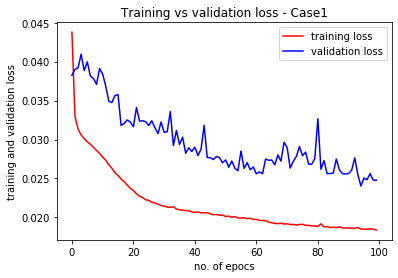

In [81]:
plt.plot(history.history['loss'] , 'r-',label = 'training loss')
plt.plot(history.history['val_loss'] , 'b-' , label = 'validation loss')
plt.title('Training vs validation loss - Case1')
plt.xlabel('no. of epocs')
plt.ylabel('training and validation loss')
plt.legend()

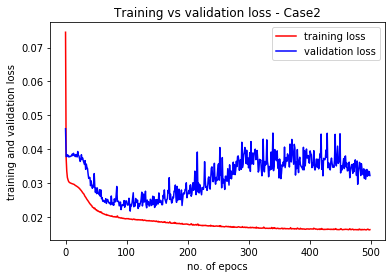

In [82]:
plt.plot(history_2.history['loss'] , 'r-',label = 'training loss')
plt.plot(history_2.history['val_loss'] , 'b-' , label = 'validation loss')
plt.title('Training vs validation loss - Case2')
plt.xlabel('no. of epocs')
plt.ylabel('training and validation loss')
plt.legend()

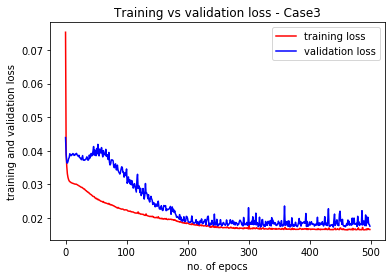

In [38]:
plt.plot(history_3.history['loss'] , 'r-',label = 'training loss')
plt.plot(history_3.history['val_loss'] , 'b-' , label = 'validation loss')
plt.title('Training vs validation loss - Case3')
plt.xlabel('no. of epocs')
plt.ylabel('training and validation loss')
plt.legend()

# MLP Model 2 - decreasing number of input neurons

In [86]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()

model2.add(Dense(20,input_dim = 6 , activation='relu'))
model2.add(Dense(20,activation='relu'))
model2.add(Dense(1,activation='linear'))

model2.compile(optimizer='adam',loss='mean_squared_error')

history_4 = model2.fit(scaled_feat , scaled_label , epochs=500 , batch_size=10000 , verbose=1 , validation_split=0.2)

Train on 440054 samples, validate on 110014 samples
Epoch 1/500
440054/440054 [==============================] - 1s 2us/step - loss: 0.3559 - val_loss: 0.1042
Epoch 2/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0595 - val_loss: 0.0576
Epoch 3/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0452 - val_loss: 0.0509
Epoch 4/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0409 - val_loss: 0.0457
Epoch 5/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0386 - val_loss: 0.0431
Epoch 6/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0372 - val_loss: 0.0414
Epoch 7/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0363 - val_loss: 0.0404
Epoch 8/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0357 - val_loss: 0.0399
Epoch 9/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0352 - va

440054/440054 [==============================] - 0s 1us/step - loss: 0.0257 - val_loss: 0.0324
Epoch 152/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0256 - val_loss: 0.0322
Epoch 153/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0256 - val_loss: 0.0334
Epoch 154/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0255 - val_loss: 0.0331
Epoch 155/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0254 - val_loss: 0.0325
Epoch 156/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0252 - val_loss: 0.0316
Epoch 157/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0254 - val_loss: 0.0313
Epoch 158/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0250 - val_loss: 0.0318
Epoch 159/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0249 - val_loss: 0.0324
Epoch 160/500
440054/440054 [====

440054/440054 [==============================] - 0s 1us/step - loss: 0.0200 - val_loss: 0.0226
Epoch 302/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0201 - val_loss: 0.0211
Epoch 303/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0200 - val_loss: 0.0209
Epoch 304/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0199 - val_loss: 0.0209
Epoch 305/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0198 - val_loss: 0.0219
Epoch 306/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0200 - val_loss: 0.0209
Epoch 307/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0199 - val_loss: 0.0208
Epoch 308/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0198 - val_loss: 0.0209
Epoch 309/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0198 - val_loss: 0.0215
Epoch 310/500
440054/440054 [====

440054/440054 [==============================] - 0s 1us/step - loss: 0.0191 - val_loss: 0.0222
Epoch 452/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0193 - val_loss: 0.0219
Epoch 453/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0191 - val_loss: 0.0220
Epoch 454/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0191 - val_loss: 0.0214
Epoch 455/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0190 - val_loss: 0.0222
Epoch 456/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0193 - val_loss: 0.0215
Epoch 457/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0191 - val_loss: 0.0212
Epoch 458/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0190 - val_loss: 0.0214
Epoch 459/500
440054/440054 [==============================] - 0s 1us/step - loss: 0.0191 - val_loss: 0.0217
Epoch 460/500
440054/440054 [====

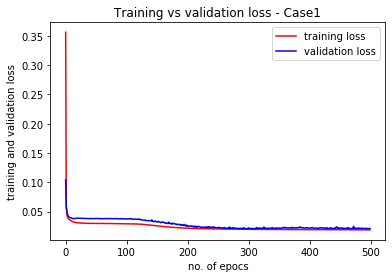

In [87]:
plt.plot(history_4.history['loss'] , 'r-',label = 'training loss')
plt.plot(history_4.history['val_loss'] , 'b-' , label = 'validation loss')
plt.title('Training vs validation loss - Case1')
plt.xlabel('no. of epocs')
plt.ylabel('training and validation loss')
plt.legend()

# Applying case 3 on testing data

--> Importing test data

In [39]:
test_data = pd.read_csv('/home/monesh04246052/kaggle - practise/test_file/test.csv')

In [40]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


--> Preprocessing test data

In [41]:
col_transformation = ColumnTransfomer()

In [42]:
col_transformation.fit_transform(test_data)

In [43]:
test_data.head()

,Gender,Age,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,4,1,1,11.0,NaN
1,0,2,0,3,5.0,NaN
2,1,3,1,5,14.0,NaN
3,1,3,1,4,9.0,NaN
4,1,2,0,4,5.0,12.0


--> Preprocessing data

In [44]:
final_test_data = pipeline.fit_transform(test_data)

In [45]:
final_test_data = pd.DataFrame(data=final_test_data , columns=test_data.columns)

In [46]:
final_test_data.head()

,Gender,Age,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.0,4.0,1.0,1.0,11.0,16.0
1,0.0,2.0,0.0,3.0,5.0,16.0
2,1.0,3.0,1.0,5.0,14.0,16.0
3,1.0,3.0,1.0,4.0,9.0,16.0
4,1.0,2.0,0.0,4.0,5.0,12.0


In [47]:
# Predictions on test data
pred = model.predict(final_test_data)

In [48]:
pred

array([[ 5.6107135 ],
       [-2.1694582 ],
       [-3.408163  ],
       ...,
       [-0.46897262],
       [18.711304  ],
       [-1.0130856 ]], dtype=float32)

In [49]:
final_predictions = pline.inverse_transform(pred)
final_predictions

array([[134382.98 ],
       [-51944.35 ],
       [-81610.09 ],
       ...,
       [-11219.426],
       [448129.03 ],
       [-24250.389]], dtype=float32)

In [53]:
final_predictions = pd.DataFrame(final_predictions)
final_predictions.columns = ['Predicted Puchase prices']
final_predictions

,Predicted Puchase prices
0,134382.984375
1,-51944.351562
2,-81610.093750
3,76387.445312
4,-109923.039062
...,...
233594,159349.187500
233595,-105289.132812
233596,-11219.425781
233597,448129.031250


In [55]:
sales_data = pd.concat([final_test_data,final_predictions],axis=1)

In [56]:
sales_data.head()

,Gender,Age,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Predicted Puchase prices
0,0.0,4.0,1.0,1.0,11.0,16.0,134382.984375
1,0.0,2.0,0.0,3.0,5.0,16.0,-51944.351562
2,1.0,3.0,1.0,5.0,14.0,16.0,-81610.093750
3,1.0,3.0,1.0,4.0,9.0,16.0,76387.445312
4,1.0,2.0,0.0,4.0,5.0,12.0,-109923.039062
